# Imports

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./data/HW5_PRSA_Data_Tiantan.csv")
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan


# Preprocessing

Date time as index

In [4]:
df['datetime']=df['year'].astype(str).str.cat([df['month'].astype(str),df['day'].astype(str),df['hour'].astype(str)], sep='-')
df['datetime']=pd.to_datetime(df['datetime'], format='%Y-%m-%d-%H')
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-03-01 01:00:00
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan,2017-02-28 19:00:00
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan,2017-02-28 20:00:00
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan,2017-02-28 21:00:00
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan,2017-02-28 22:00:00


In [5]:
df = df.set_index('datetime')
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
2013-03-01 01:00:00,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2013-03-01 02:00:00,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
2017-02-28 20:00:00,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
2017-02-28 21:00:00,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan


In [6]:
df = df.drop(['year','month','day','hour', 'No'], axis=1)
df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2013-03-01 00:00:00,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
2013-03-01 01:00:00,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2013-03-01 02:00:00,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
2013-03-01 03:00:00,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
2013-03-01 04:00:00,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
2017-02-28 20:00:00,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
2017-02-28 21:00:00,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan


Aggregrate to daily average

In [7]:
df = df.resample('D').mean().round(2)
df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-03-01,8.62,14.46,8.88,21.58,450.00,68.08,1.33,1028.78,-21.47,0.0,3.31
2013-03-02,31.71,37.04,27.17,50.48,934.78,34.04,0.49,1028.85,-16.96,0.0,0.79
2013-03-03,98.04,121.33,55.62,82.96,2028.96,16.92,4.99,1016.46,-12.31,0.0,1.22
2013-03-04,22.33,37.58,16.58,42.04,895.79,53.12,10.56,1019.45,-14.00,0.0,2.50
2013-03-05,141.67,156.38,74.33,101.67,2408.00,94.00,7.21,1012.70,-7.78,0.0,0.91
...,...,...,...,...,...,...,...,...,...,...,...
2017-02-24,36.42,51.88,6.71,51.83,925.00,42.57,5.17,1021.01,-11.14,0.0,1.60
2017-02-25,10.21,23.04,5.08,35.79,458.33,60.17,7.25,1018.81,-10.75,0.0,1.83
2017-02-26,24.17,41.92,7.50,52.21,612.50,45.43,7.21,1020.34,-8.26,0.0,1.57


For simplicity, assume that pressure (PRES) is independent of any factors.

In [8]:
df_pres = pd.DataFrame(df['PRES'], index=df.index)
df_pres

,PRES
datetime,
2013-03-01,1028.78
2013-03-02,1028.85
2013-03-03,1016.46
2013-03-04,1019.45
2013-03-05,1012.70
...,...
2017-02-24,1021.01
2017-02-25,1018.81
2017-02-26,1020.34


In [9]:
df_train, df_test=train_test_split(df_pres,test_size=0.1,shuffle=False)
df_train

,PRES
datetime,
2013-03-01,1028.78
2013-03-02,1028.85
2013-03-03,1016.46
2013-03-04,1019.45
2013-03-05,1012.70
...,...
2016-09-30,1011.28
2016-10-01,1010.48
2016-10-02,1008.65


In [10]:
df_test

,PRES
datetime,
2016-10-05,1014.31
2016-10-06,1020.78
2016-10-07,1015.28
2016-10-08,1018.00
2016-10-09,1018.90
...,...
2017-02-24,1021.01
2017-02-25,1018.81
2017-02-26,1020.34


# Data Exploratory Analysis

In [11]:
df_pres.describe()

,PRES
count,1461.000000
mean,1012.552225
std,10.064328
min,990.350000
25%,1004.020000
50%,1012.470000
75%,1020.960000
max,1039.950000


PRES data plot

<AxesSubplot:xlabel='datetime'>

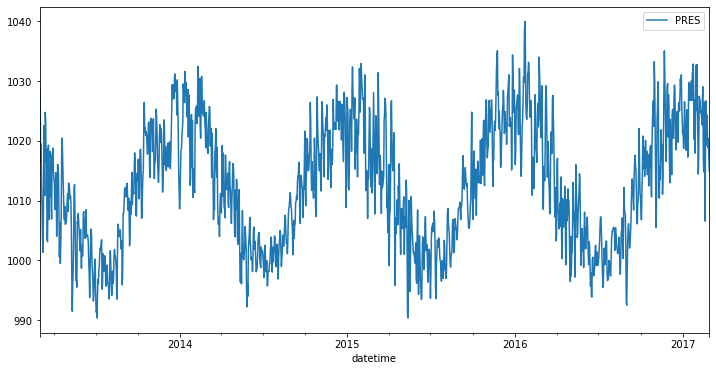

In [12]:
df_pres.plot(figsize=(12,6))

The data looks to be having a constant mean with seasonality.

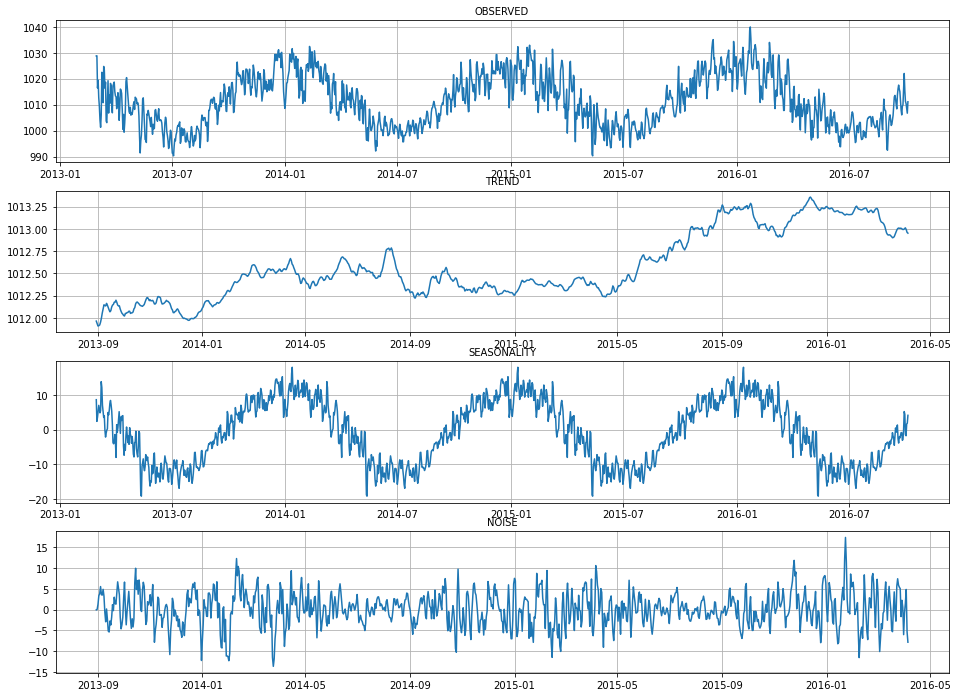

In [29]:
res=sm.tsa.seasonal_decompose(df_train['PRES'], period=365)
fig, axs = plt.subplots(4, figsize=(16,12))
axs[0].set_title('OBSERVED', fontsize=10)
axs[0].plot(res.observed)
axs[0].grid()

axs[1].set_title('TREND', fontsize=10)
axs[1].plot(res.trend)
axs[1].grid()

axs[2].set_title('SEASONALITY', fontsize=10)
axs[2].plot(res.seasonal)
axs[2].grid()

axs[3].set_title('NOISE', fontsize=10)
axs[3].plot(res.resid)
axs[3].grid()

plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

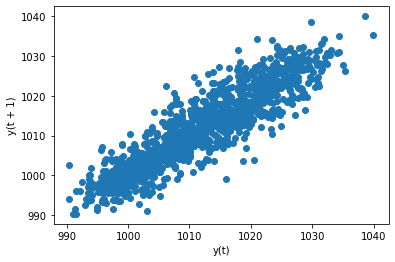

In [14]:
pd.plotting.lag_plot(df_train['PRES'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

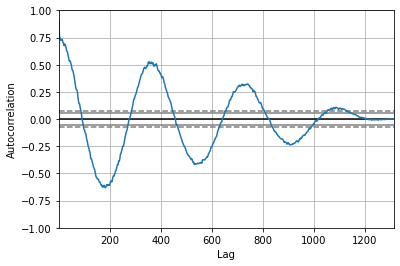

In [15]:
pd.plotting.autocorrelation_plot(df_train['PRES'])

ACF

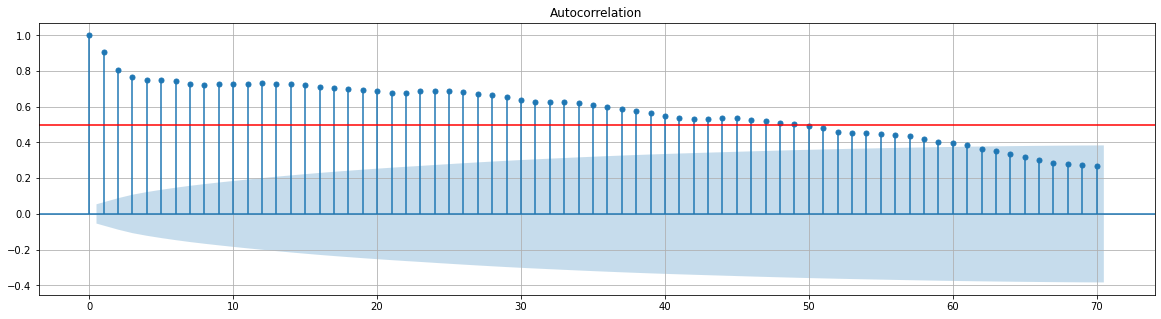

In [16]:
fig, ax = plt.subplots(figsize=(20, 5))
sm.graphics.tsa.plot_acf(df_train['PRES'], lags=70, ax=ax)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.grid()
plt.show()

PACF

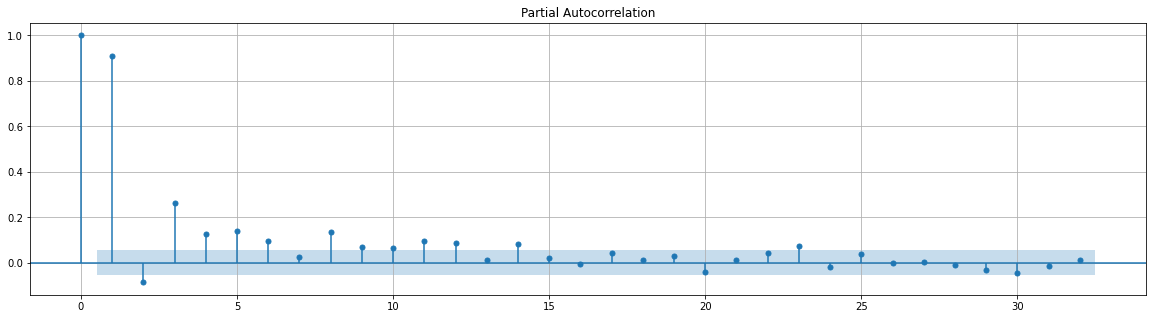

In [17]:
fig, ax = plt.subplots(figsize=(20, 5))
sm.graphics.tsa.plot_pacf(df_train['PRES'], ax=ax)
plt.grid()
plt.show()

# AR Model

Model Benchmark

In [18]:
lags=[1,2,4,14,23]
aics=list()
mapes=list()
best_model = None
for lag in lags:
    model=AutoReg(df_train['PRES'],lags=lag,trend='t',seasonal=True,period=365,exog=None,missing='drop') 
    result = model.fit()

    pred=result.predict(start='2014-3-1',end='2016-10-4')

    df_train[f'PRES_AR_{lag}'] = pred
    df_train_ar = df_train.dropna()

    mape = mean_absolute_percentage_error(df_train_ar['PRES'],df_train_ar[f'PRES_AR_{lag}'])

    print("Lag:",lag)
    print("\tAIC:",result.aic)
    print("\tMAPE:",mape)

    aics.append(result.aic)
    mapes.append(mape)

    if result.aic < max(aics, default=float('inf')):
        best_model = result

print("Best AIC: Lag",lags[aics.index(min(aics))],"\nBest MAPE: Lag",lags[mapes.index(min(mapes))])
result = best_model

Lag: 1
	AIC: 2.921610731838509
	MAPE: 0.0024678091371839344
Lag: 2
	AIC: 2.8668147605752585
	MAPE: 0.002367506891689455
Lag: 4
	AIC: 2.8580283342671815
	MAPE: 0.002357837697623528
Lag: 14
	AIC: 2.8368190093443006
	MAPE: 0.0023293585367657296
Lag: 23
	AIC: 2.822048584800793
	MAPE: 0.0023069274566100634
Best AIC: Lag 23 
Best MAPE: Lag 23


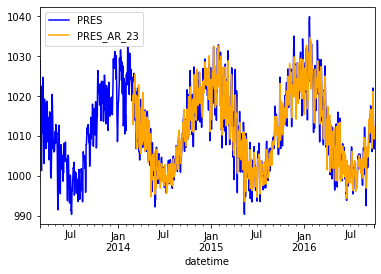

In [19]:
df_train['PRES'].plot(color='blue')
df_train['PRES_AR_23'].plot(color='orange')
plt.legend()
plt.show()

In [20]:
pred=result.predict(start=df_test.index[0],end=df_test.index[-1])
df_test['PRED_AR']=pred
df_test

,PRES,PRED_AR
datetime,,
2016-10-05,1014.31,1014.129246
2016-10-06,1020.78,1013.964581
2016-10-07,1015.28,1014.833907
2016-10-08,1018.00,1009.526613
2016-10-09,1018.90,1011.621424
...,...,...
2017-02-24,1021.01,1022.149537
2017-02-25,1018.81,1021.229542
2017-02-26,1020.34,1024.899547


In [21]:
print('MAPE:', mean_absolute_percentage_error(df_test['PRES'],df_test['PRED_AR']))

MAPE: 0.004692879602313358


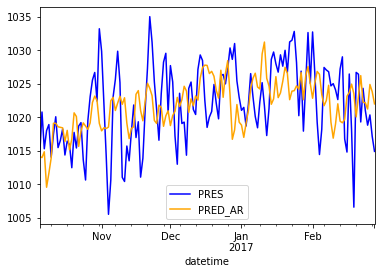

In [22]:
df_test['PRES'].plot(color='blue')
df_test['PRED_AR'].plot(color='orange')
plt.legend()
plt.show()

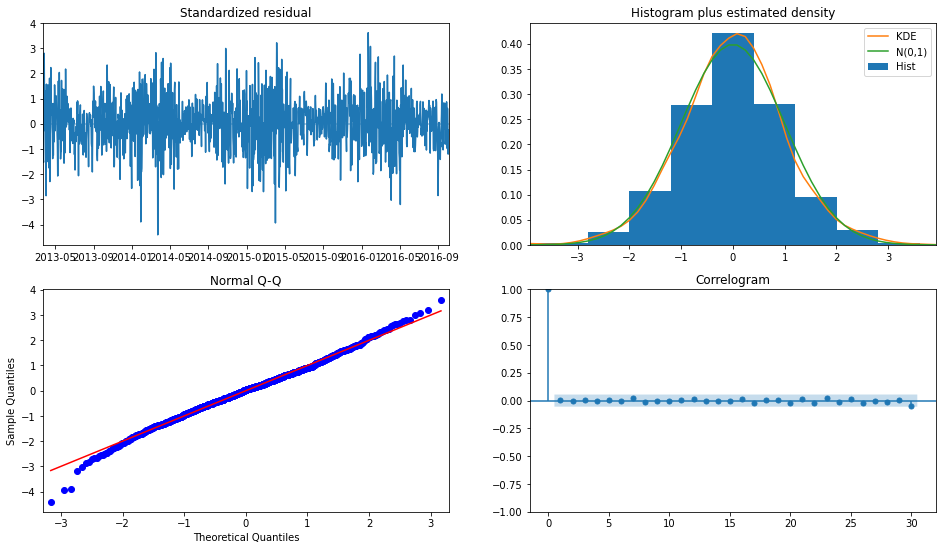

In [23]:
result.plot_diagnostics(figsize=(16,9),lags=30)
plt.show()

# Prediction

March of 2017 Prediction

In [24]:
march_pred = result.predict(start='2017-3-1',end='2017-3-31')
march_pred

2017-03-01    1015.719556
2017-03-02    1016.936217
2017-03-03    1018.779546
2017-03-04    1020.306211
2017-03-05    1019.252877
2017-03-06    1018.129544
2017-03-07    1018.726213
2017-03-08    1027.139548
2017-03-09    1025.426216
2017-03-10    1020.292884
2017-03-11    1018.482885
2017-03-12    1016.762886
2017-03-13    1017.216219
2017-03-14    1013.042884
2017-03-15    1011.099549
2017-03-16    1012.259548
2017-03-17    1013.109547
2017-03-18    1013.502879
2017-03-19    1018.209546
2017-03-20    1017.532879
2017-03-21    1018.822880
2017-03-22    1020.912880
2017-03-23    1023.062071
2017-03-24    1020.093458
2017-03-25    1016.351010
2017-03-26    1012.879184
2017-03-27    1011.268644
2017-03-28    1011.559941
2017-03-29    1011.999737
2017-03-30    1012.948416
2017-03-31    1011.097979
Freq: D, dtype: float64

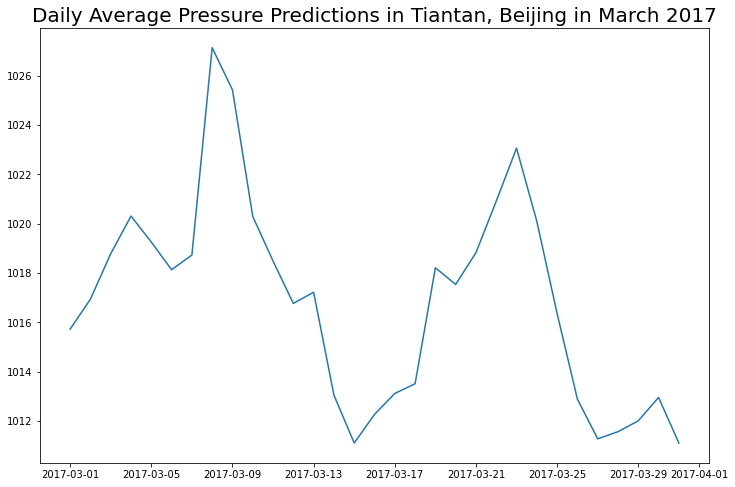

In [25]:
plt.figure(figsize = (12,8))
plt.plot(march_pred)
plt.title('Daily Average Pressure Predictions in Tiantan, Beijing in March 2017', fontsize=20)
plt.show()

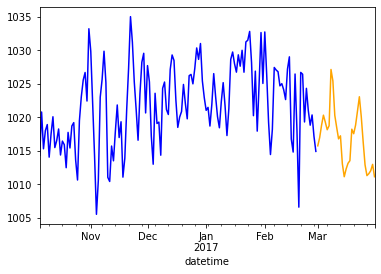

In [26]:
df_test['PRES'].plot(color='blue')
march_pred.plot(color='orange')
plt.show()

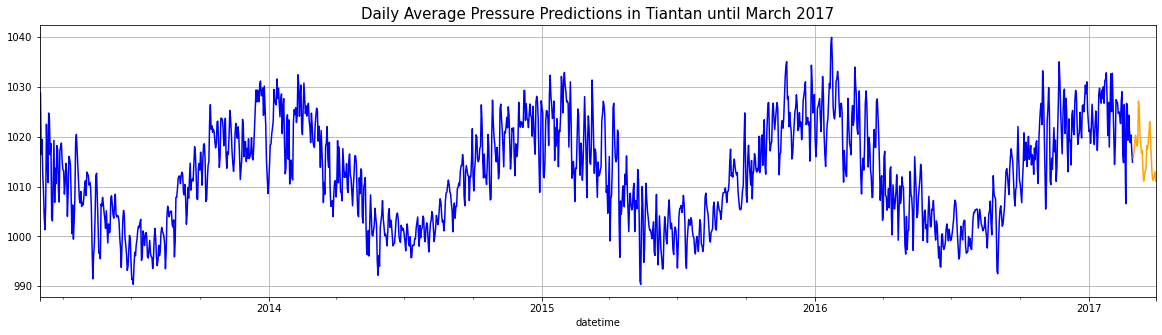

In [27]:
plt.figure(figsize = (20,5))
plt.title('Daily Average Pressure Predictions in Tiantan until March 2017', fontsize=15)
df['PRES'].plot(color='blue')
march_pred.plot(color='orange')
plt.grid()
plt.show()

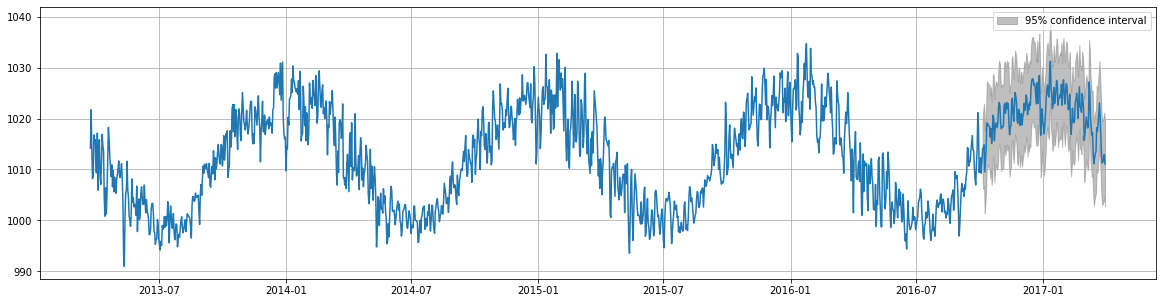

In [28]:
result.plot_predict(start=df.index[0],end='2017-03-31', figsize=(20,5))
plt.grid()
plt.show()